In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
pip install citipy

  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559704 sha256=8446aa63d0ef86219cda4430e1acab4a0f471c722c8776e3bd9b3257cacbcfc3
  Stored in directory: c:\users\farah\appdata\local\pip\cache\wheels\72\ae\63\5d03cf6dfe5c0e9328fb73f8b30da1948a06b9cceaf2c68d2d
Successfully built citipy
Note: you may need to restart the kernel to use updated packages.


In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

632

In [8]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [9]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

cockburn town tc
gat ly
parvatsar in
punta arenas cl
saint george bm


In [10]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [11]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3670d3e16ecfc5ec505f800bbde46041


In [14]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [15]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [21]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 33 of Set 25 | rawson
Processing Record 34 of Set 25 | fort nelson
Processing Record 35 of Set 25 | cape town
Processing Record 36 of Set 25 | agaro
Processing Record 37 of Set 25 | tuatapere
Processing Record 38 of Set 25 | ushuaia
Processing Record 39 of Set 25 | cherskiy
Processing Record 40 of Set 25 | mehran
Processing Record 41 of Set 25 | carnarvon
Processing Record 42 of Set 25 | grand river south east
City not found. Skipping...
Processing Record 43 of Set 25 | jalu
Processing Record 44 of Set 25 | lorengau
Processing Record 45 of Set 25 | tarko-sale
Processing Record 46 of Set 25 | tsihombe
City not found. Skipping...
Processing Record 47 of Set 25 | esperance
Processing Record 48 of Set 25 | qaanaaq
Processing Record 49 of Set 25 | atuona
Processing Record 50 of Set 25 | marsa matruh
Processing Record 51 of Set 25 | guarda
Processing Record 52 of Set 25 | marzuq
Processing Record 53 of Set 25 | rikitea
Processing Record 54 of Set 25 | kapaa
Processing Recor

Processing Record 37 of Set 28 | ugoofaaru
Processing Record 38 of Set 28 | sembe
Processing Record 39 of Set 28 | nishihara
Processing Record 40 of Set 28 | gurjaani
Processing Record 41 of Set 28 | nautla
Processing Record 42 of Set 28 | atar
Processing Record 43 of Set 28 | cabittaogan
Processing Record 44 of Set 28 | bolungarvik
City not found. Skipping...
Processing Record 45 of Set 28 | yumen
Processing Record 46 of Set 28 | petrovsk-zabaykalskiy
Processing Record 47 of Set 28 | sisimiut
Processing Record 48 of Set 28 | kavieng
Processing Record 49 of Set 28 | kodiak
Processing Record 50 of Set 28 | tabuk
Processing Record 1 of Set 29 | haines junction
Processing Record 2 of Set 29 | kuching
Processing Record 3 of Set 29 | victoria
Processing Record 4 of Set 29 | rio cuarto
Processing Record 5 of Set 29 | barrow
Processing Record 6 of Set 29 | buqayq
City not found. Skipping...
Processing Record 7 of Set 29 | amderma
City not found. Skipping...
Processing Record 8 of Set 29 | mah

Processing Record 17 of Set 32 | codrington
Processing Record 18 of Set 32 | batticaloa
Processing Record 19 of Set 32 | awbari
Processing Record 20 of Set 32 | mollendo
Processing Record 21 of Set 32 | mehamn
Processing Record 22 of Set 32 | saint george
Processing Record 23 of Set 32 | guarapari
Processing Record 24 of Set 32 | egvekinot
Processing Record 25 of Set 32 | ornskoldsvik
Processing Record 26 of Set 32 | boda
Processing Record 27 of Set 32 | sistranda
Processing Record 28 of Set 32 | kozhva
Processing Record 29 of Set 32 | nantucket
Processing Record 30 of Set 32 | misratah
Processing Record 31 of Set 32 | babanusah
City not found. Skipping...
Processing Record 32 of Set 32 | saint-augustin
Processing Record 33 of Set 32 | baherden
Processing Record 34 of Set 32 | saint-georges
Processing Record 35 of Set 32 | bilma
Processing Record 36 of Set 32 | natal
Processing Record 37 of Set 32 | turayf
Processing Record 38 of Set 32 | bandar-e lengeh
Processing Record 39 of Set 32 

Processing Record 1 of Set 36 | shingu
Processing Record 2 of Set 36 | dese
Processing Record 3 of Set 36 | okha
Processing Record 4 of Set 36 | novolvovsk
City not found. Skipping...
Processing Record 5 of Set 36 | chiredzi
Processing Record 6 of Set 36 | manicore
Processing Record 7 of Set 36 | notre-dame-du-lac
Processing Record 8 of Set 36 | conde
Processing Record 9 of Set 36 | nuevitas
Processing Record 10 of Set 36 | sisophon
Processing Record 11 of Set 36 | cururupu
Processing Record 12 of Set 36 | moranbah
Processing Record 13 of Set 36 | katsuura
Processing Record 14 of Set 36 | ginda
Processing Record 15 of Set 36 | pevek
Processing Record 16 of Set 36 | bongandanga
Processing Record 17 of Set 36 | neyshabur
Processing Record 18 of Set 36 | vaitupu
City not found. Skipping...
Processing Record 19 of Set 36 | yenagoa
Processing Record 20 of Set 36 | anta
Processing Record 21 of Set 36 | idrinskoye
Processing Record 22 of Set 36 | kaliua
Processing Record 23 of Set 36 | pampa


In [22]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rawson,-43.3002,-65.1023,53.58,38,0,30.51,AR,2021-05-24 22:55:36
1,Fort Nelson,58.8053,-122.7002,56.79,30,75,13.80,CA,2021-05-24 22:55:36
2,Cape Town,-33.9258,18.4232,61.12,87,20,6.87,ZA,2021-05-24 22:54:43
3,Agaro,7.8500,36.6500,60.46,93,78,1.88,ET,2021-05-24 22:55:37
4,Tuatapere,-46.1333,167.6833,42.62,67,8,3.20,NZ,2021-05-24 22:55:37
5,Ushuaia,-54.8000,-68.3000,29.86,93,90,31.07,AR,2021-05-24 22:55:37
6,Cherskiy,68.7500,161.3000,50.56,36,12,8.97,RU,2021-05-24 22:55:38
7,Mehran,33.1222,46.1646,80.08,15,0,9.13,IR,2021-05-24 22:55:38
8,Carnarvon,-24.8667,113.6333,51.87,93,0,8.05,AU,2021-05-24 22:55:38
9,Jalu,29.0331,21.5482,79.54,12,0,7.49,LY,2021-05-24 22:55:39


In [25]:
new_column_order=["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rawson,AR,2021-05-24 22:55:36,-43.3002,-65.1023,53.58,38,0,30.51
1,Fort Nelson,CA,2021-05-24 22:55:36,58.8053,-122.7002,56.79,30,75,13.80
2,Cape Town,ZA,2021-05-24 22:54:43,-33.9258,18.4232,61.12,87,20,6.87
3,Agaro,ET,2021-05-24 22:55:37,7.8500,36.6500,60.46,93,78,1.88
4,Tuatapere,NZ,2021-05-24 22:55:37,-46.1333,167.6833,42.62,67,8,3.20
...,...,...,...,...,...,...,...,...,...
562,Mandera,KE,2021-05-24 22:57:58,3.9366,41.8670,77.36,62,24,15.30
563,Lavumisa,SZ,2021-05-24 22:57:58,-27.3100,31.8920,56.19,95,0,4.25
564,Ondangwa,NA,2021-05-24 22:57:58,-17.9167,15.9500,60.80,59,0,4.61
565,Ust-Kulom,RU,2021-05-24 22:57:58,61.6864,53.6902,47.19,92,48,5.73


In [27]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [28]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

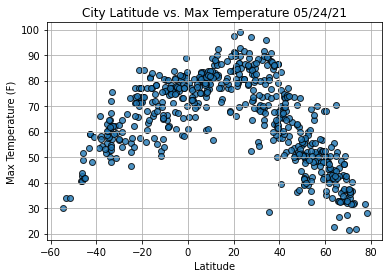

In [29]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

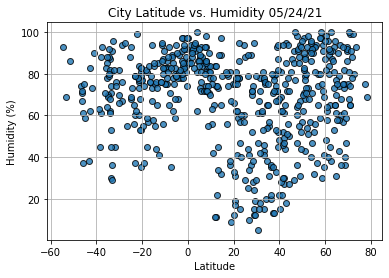

In [30]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

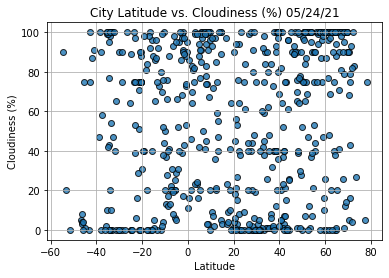

In [31]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

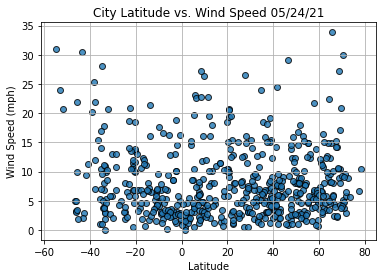

In [32]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()